# 6.4. Machine Learning Part 1 - Unemployment in America

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

### 1. Importing libraries and data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [5]:
path = r'C:\Users\eminc\OneDrive\A  - Career Foundry\Data Immersion\A6 Advanced Analytics & Dashboard Design\6.0. - Project'

In [6]:
df = pd.read_csv(os.path.join(path, '6 - 02 Data', 'Prepared Data', 'Unemployment in America.csv'))

### Directions 1 and 2: Libraries and necessary modules imported

### 2. Data cleaning

In [7]:
df.columns

Index(['FIPS Code', 'State/Area', 'Year', 'Month', 'Month/Year', 'Year/Month',
       'Population', 'Labor Force', 'LF % of Population', 'Employment',
       '% of Employed', 'Unemployment', '% of Unemployed',
       'Unemployment Categories', 'Decades'],
      dtype='object')

In [8]:
df.head(20)

,FIPS Code,State/Area,Year,Month,Month/Year,Year/Month,Population,Labor Force,LF % of Population,Employment,% of Employed,Unemployment,% of Unemployed,Unemployment Categories,Decades
0,1,Alabama,1976,1,1/1976,1976/1,2605000,1484555,57.0,1386023,53.2,98532,6.6,Mid Unemployment,1970s
1,2,Alaska,1976,1,1/1976,1976/1,232000,160183,69.0,148820,64.1,11363,7.1,Mid Unemployment,1970s
2,4,Arizona,1976,1,1/1976,1976/1,1621000,964120,59.5,865871,53.4,98249,10.2,High Unemployment,1970s
3,5,Arkansas,1976,1,1/1976,1976/1,1536000,889044,57.9,824395,53.7,64649,7.3,Mid Unemployment,1970s
4,6,California,1976,1,1/1976,1976/1,15621000,9774280,62.6,8875685,56.8,898595,9.2,High Unemployment,1970s
5,37,Los Angeles County,1976,1,1/1976,1976/1,5273000,3381856,64.1,3081806,58.4,300050,8.9,High Unemployment,1970s
6,8,Colorado,1976,1,1/1976,1976/1,1832000,1230966,67.2,1160104,63.3,70862,5.8,Mid Unemployment,1970s
7,9,Connecticut,1976,1,1/1976,1976/1,2248000,1442847,64.2,1301974,57.9,140873,9.8,High Unemployment,1970s
8,10,Delaware,1976,1,1/1976,1976/1,417000,261418,62.7,240543,57.7,20875,8.0,High Unemployment,1970s
9,11,District of Columbia,1976,1,1/1976,1976/1,520000,334691,64.4,305677,58.8,29014,8.7,High Unemployment,1970s


In [9]:
df.shape

(29892, 15)

In [10]:
# Rename the columns in the same way as in Exercise 6.2.

# Columns already renamed in this latest version of this data

In [11]:
df.describe()

,FIPS Code,Year,Month,Population,Labor Force,LF % of Population,Employment,% of Employed,Unemployment,% of Unemployed
count,29892.000000,29892.000000,29892.00000,2.989200e+04,2.989200e+04,29892.000000,2.989200e+04,29892.000000,2.989200e+04,29892.000000
mean,990.830189,1999.000000,6.50000,4.235528e+06,2.734826e+06,65.516202,2.565279e+06,61.670417,1.695473e+05,5.920788
std,6935.157218,13.564887,3.45211,4.603808e+06,2.942369e+06,4.304355,2.748895e+06,4.739074,2.145427e+05,2.207521
min,1.000000,1976.000000,1.00000,2.320000e+05,1.600220e+05,51.000000,1.487180e+05,41.600000,4.980000e+03,1.900000
25%,17.000000,1987.000000,3.75000,1.103986e+06,7.318940e+05,62.800000,6.795922e+05,58.600000,3.737100e+04,4.300000
50%,30.000000,1999.000000,6.50000,2.934918e+06,1.878042e+06,65.900000,1.750450e+06,61.800000,1.039425e+05,5.500000
75%,42.000000,2011.000000,9.25000,5.390502e+06,3.417254e+06,68.500000,3.230634e+06,65.100000,2.102450e+05,7.100000
max,51000.000000,2022.000000,12.00000,3.123644e+07,1.960070e+07,75.700000,1.875432e+07,73.100000,3.018611e+06,30.600000


##### Missing values

In [12]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

FIPS Code                  0
State/Area                 0
Year                       0
Month                      0
Month/Year                 0
Year/Month                 0
Population                 0
Labor Force                0
LF % of Population         0
Employment                 0
% of Employed              0
Unemployment               0
% of Unemployed            0
Unemployment Categories    0
Decades                    0
dtype: int64

##### Duplicates check

In [13]:
dups = df.duplicated()

In [14]:
dups.shape # No dups

(29892,)

##### Extreme values checks

C:\Users\eminc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='% of Unemployed', ylabel='Density'>

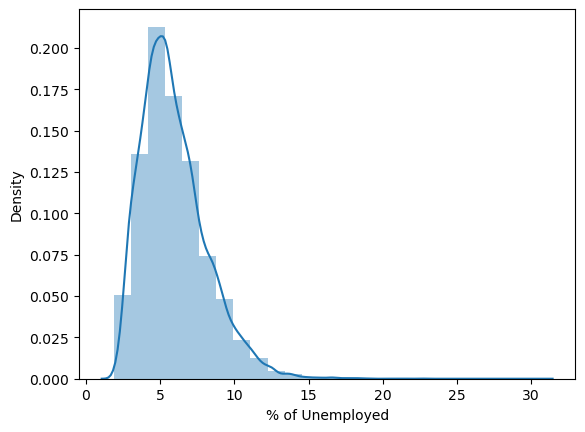

In [15]:
sns.distplot(df['% of Unemployed'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

# In this case what seems to be seen as outliers reflect real figures, because in some states unemployment rate was
# high in certain months. 



In [16]:
df['% of Unemployed'].mean() # Check the mean

5.920788170748002

In [17]:
df['% of Unemployed'].median() # Check the median

5.5

In [18]:
df['% of Unemployed'].max() # Check the max

30.6

### Direction 3: This dataset is already cleaned and the outliers of this selected variable reflect reality due to the fact that high unemployment rates appeared in some states in some months.

### 3. Data prep for regression analysis 

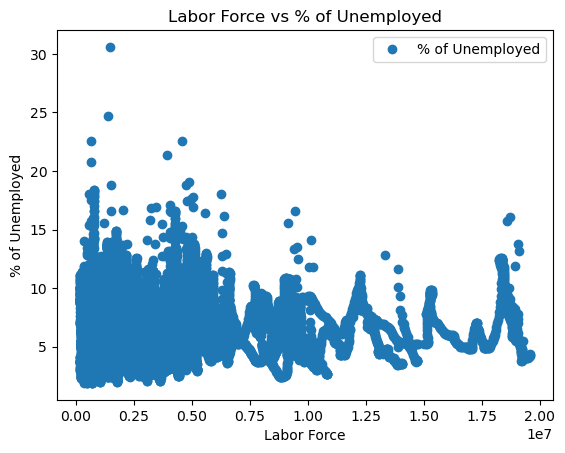

In [19]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Labor Force', y='% of Unemployed',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Labor Force vs % of Unemployed')  
plt.xlabel('Labor Force')  
plt.ylabel('% of Unemployed')  
plt.show()

### Direction 4: Like to test the relationship between Labor Force and % of Unemployed

### Direction 5:Hypothesis: The higher the Labor Force the lower the % of Unemployed

In [20]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Labor Force'].values.reshape(-1,1)
y = df['% of Unemployed'].values.reshape(-1,1)

In [21]:
X

array([[1484555],
       [ 160183],
       [ 964120],
       ...,
       [ 784323],
       [3068610],
       [ 293595]], dtype=int64)

In [22]:
y

array([[ 6.6],
       [ 7.1],
       [10.2],
       ...,
       [ 4.1],
       [ 3. ],
       [ 3.9]])

In [23]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Directions 6 and 7: Variables reshaped and data set splited into training and test set

### 4. Regression analysis

In [24]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [25]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [26]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

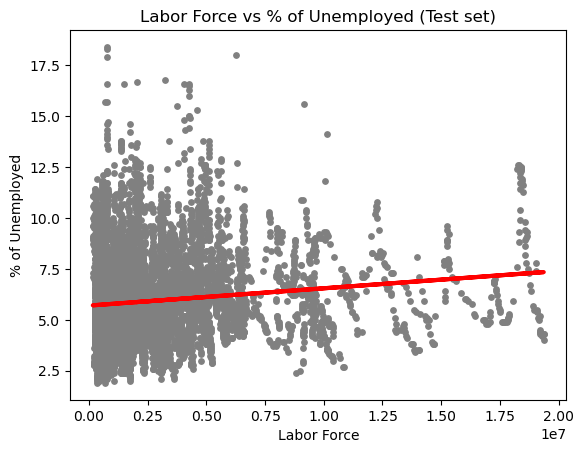

In [27]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Labor Force vs % of Unemployed (Test set)')
plot_test.xlabel('Labor Force')
plot_test.ylabel('% of Unemployed')
plot_test.show()

### Direction 9: Plot created that shows the regression line on the test set

### Direction 10: The regression line doesn't fit very well to the model, because most of the dots are not close to the line

In [28]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [29]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[8.48808578e-08]]
Mean squared error:  4.7101734749297695
R2 score:  0.016093787328684495


In [30]:
y_predicted

array([[6.11780238],
       [5.81006496],
       [5.88794739],
       ...,
       [5.75831047],
       [5.76564876],
       [5.87439251]])

In [31]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,4.1,6.117802
1,11.2,5.810065
2,5.4,5.887947
3,4.3,5.725983
4,4.3,6.931888
5,7.2,5.734356
6,4.0,5.864122
7,8.3,5.752622
8,3.5,5.979045
9,4.2,5.864097


### Direction 11: Check the model performance statistics—MSE and R2 score.: The MSE is low, therefore it is close to the observations. But the r-squared value is extremely low almost zero and doesn't fit to the model.

### Direction 12: Compare the predicted y values with the actual y values in a dataframe. - The prdedicted  values are close to the actual values

##### Compare how the regression fits the training set

In [32]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [33]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [34]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[8.48808578e-08]]
Mean squared error:  4.846915633647197
R2 score:  0.01272797747367782


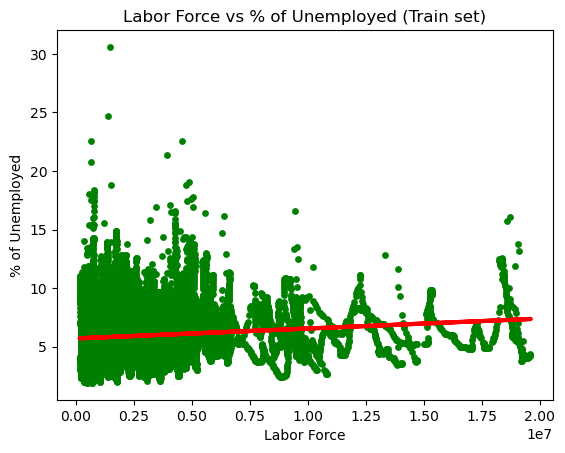

In [35]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Labor Force vs % of Unemployed (Train set)')
plot_test.xlabel('Labor Force')
plot_test.ylabel('% of Unemployed')
plot_test.show()

### Bonus: performance improvement after removing outliers

In [36]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df[df['% of Unemployed'] <=15] 

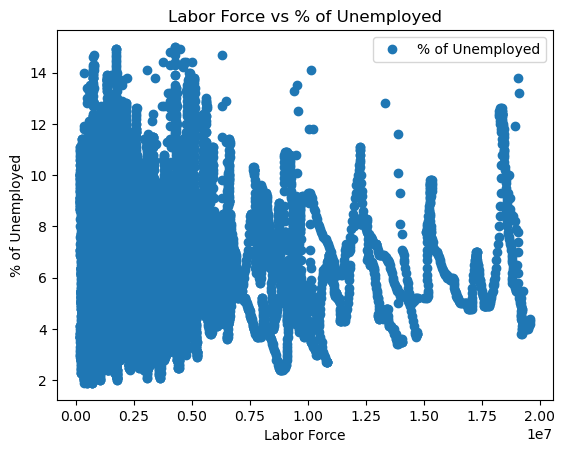

In [37]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'Labor Force', y='% of Unemployed', style='o')  
plt.title('Labor Force vs % of Unemployed')  
plt.xlabel('Labor Force')  
plt.ylabel('% of Unemployed')  
plt.show()

In [38]:
# Reshape again.

X_2 = df_test['Labor Force'].values.reshape(-1,1)
y_2 = df_test['% of Unemployed'].values.reshape(-1,1)

In [39]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [40]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [41]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [42]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [43]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[8.5146774e-08]]
Mean squared error:  4.5258726533920495
R2 score:  0.015760498427171976


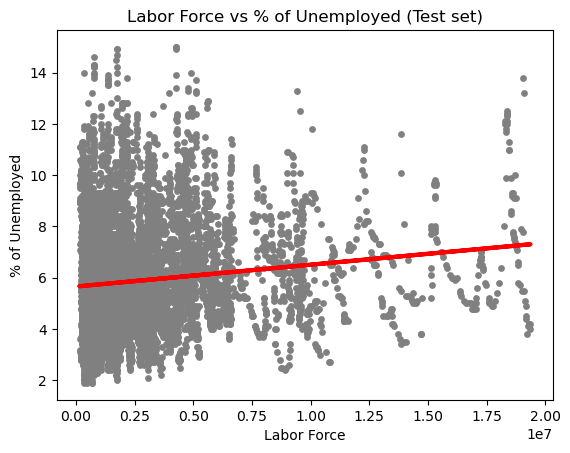

In [44]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Labor Force vs % of Unemployed (Test set)')
plot_test.xlabel('Labor Force')
plot_test.ylabel('% of Unemployed')
plot_test.show()

In [45]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,11.0,6.140434
1,3.3,5.941233
2,3.8,5.777870
3,4.1,5.765656
4,6.5,5.845223
5,4.9,6.474143
6,11.6,5.754895
7,7.8,5.822276
8,4.8,6.431381
9,3.5,5.705300


### Direction 13: Include your thoughts on how well the model performed on the test set in a markdown cell. Include any reflections you have on the impact of possible data bias. - The model performed very well. Influencing the data by deleting outliers in the training had not big effect on the test model.